# ACTIVIDAD EN CLASE
## *Juan David Ortega Murcia*

## LIBRERIAS

In [114]:
from sklearn.linear_model import Ridge, ElasticNet, BayesianRidge, HuberRegressor, PassiveAggressiveRegressor, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd

## CARGAR EL ARCHIVO

In [115]:
data = pd.read_csv('housing_in_london_monthly_variables.csv')

## VER LOS PRIMEROS REGISTROS

In [116]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


## VER EL TIPO DE DATO EN CADA COLUMNA

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


## ELIMINAR COLUMNAS QUE NO INTERESAN

In [118]:
data = data.drop('code', axis=1)
data = data.drop('no_of_crimes', axis=1)
data = data.drop(data[data['houses_sold'].isna()].index, axis=0).reset_index(drop=True)

## AGREGAR COLUMNAS PARA AGRUPAR POR DIA, MES Y AÑO

In [119]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].apply(lambda x: x.year)
data['month'] = data['date'].apply(lambda x: x.month)
data = data.drop('date', axis=1)

## CONVERTIR VARIABLES CATEGORICAS EN VARIABLES FICTICIAS Y AGREGARLAS AL DATAFRAME

In [120]:
area = pd.get_dummies(data['area'], prefix='area')
data = pd.concat([data, area], axis=1)
data = data.drop('area', axis=1)

## DEFINIR LAS 'X' (VALORES PARA PREDECIR) Y LAS 'Y' (VALORES A PREDECIR)

In [121]:
y = data['average_price']
X = data.drop('average_price', axis=1)

## SEPARAR LOS DATOS DE ENTRENAMIENTO Y PRUEBA 70/30

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)

## ESTANDARIZAR CARACTERISTICAS EN X

In [123]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

## VISUALIZAR COMO QUEDAN LOS DATAFRAME DE ENTRENAMIENTO

In [124]:
X_train

,houses_sold,borough_flag,year,month,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,area_camden,...,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster,area_yorks and the humber
10752,-0.005908,-1.657173,1.542734,1.315615,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
10236,0.222400,-1.657173,-0.963307,1.024950,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
4512,-0.298115,0.603437,-1.380980,-1.300369,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
9208,-0.293663,0.603437,0.985836,1.024950,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,6.754536,-0.152846,-0.152117,-0.152482,-0.151385
2672,-0.303063,0.603437,1.542734,-0.428374,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.298033,0.603437,-1.659429,0.734285,-0.145406,-0.150649,6.720615,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
5192,-0.281790,0.603437,-0.545633,1.606280,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
12172,0.323815,-1.657173,0.707387,0.443620,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385
235,-0.318976,0.603437,0.985836,0.443620,-0.145406,-0.150649,-0.148796,-0.155015,-0.152482,-0.148049,...,-0.148796,-0.156801,-0.152482,-0.148423,-0.146165,-0.148049,-0.152846,-0.152117,-0.152482,-0.151385


In [125]:
y_train

10752    128885
10236    137190
4512      73211
9208     342013
2672     473140
          ...  
905       64510
5192     203931
12172    196204
235      761544
13349    173811
Name: average_price, Length: 9418, dtype: int64

## DICCIONARIO DE MODELOS

In [126]:
models = {
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "SGDRegressor": SGDRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
    
}


## ENTRENAMIENTO DE MODELOS Y ALMACENAMIENTO DE RESULTADOS

In [127]:
model_results = {}
for model_name, model in models.items():
    reg_pipeline = Pipeline([("model", model)])
    reg_pipeline.fit(X_train, y_train)
    model_results[model_name] = reg_pipeline

## EVALUACION DE MODELO EN CONJUNTO DE PRUEBA Y ALMACENAMIENTO DE PUNTAJES R²

In [128]:
test_scores = {}
for model_name, model in model_results.items():
    y_pred = model.predict(X_test)
    test_scores[model_name] = r2_score(y_test, y_pred)
    print(model_name + " R^2: {:.4f}".format(model.score(X_test, y_test)))

Ridge R^2: 0.8482
ElasticNet R^2: 0.7635
BayesianRidge R^2: 0.8482
HuberRegressor R^2: 0.8344
PassiveAggressiveRegressor R^2: 0.8269
SGDRegressor R^2: 0.8483
RandomForestRegressor R^2: 0.9959


## VISUALIZACION DE PUNTAJES R²

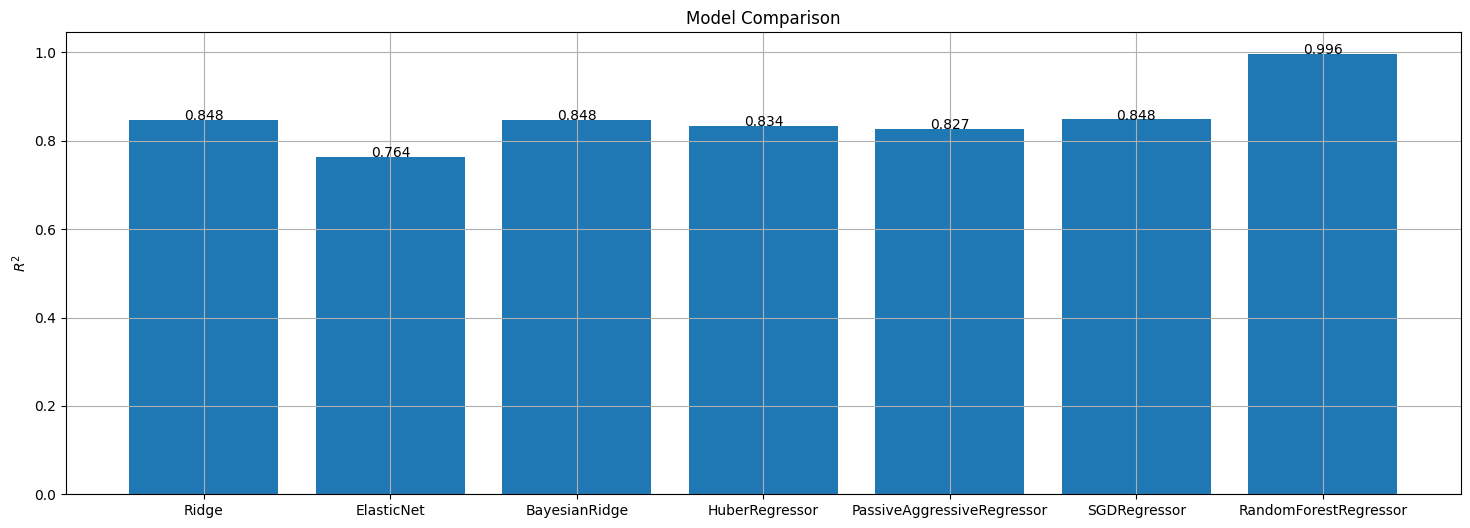

In [129]:
plt.figure(figsize=(18, 6))
bars = plt.bar(test_scores.keys(), test_scores.values())
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center')
plt.ylabel('$R^2$')
plt.title('Model Comparison')
plt.grid()
plt.show()